#### LSTM for international airline passengers

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


#### Convert an array of values into a dataset matrix


In [2]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY

#### Fix random seed for reproducibility


In [3]:
numpy.random.seed(7)

Link to dataset : <br>
https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

#### Load the dataset


In [5]:
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

#### Normalize the dataset

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### Split into train and test sets


In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#### Reshape into X=t and Y=t+1

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Reshape input to be [samples, time steps, features]


In [9]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Create and fit the LSTM network


In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 5s - loss: 0.0376 - 5s/epoch - 54ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0181 - 258ms/epoch - 3ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0139 - 251ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0128 - 361ms/epoch - 4ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0118 - 251ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0110 - 298ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0101 - 265ms/epoch - 3ms/step
Epoch 8/100
94/94 - 1s - loss: 0.0092 - 587ms/epoch - 6ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0084 - 487ms/epoch - 5ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0076 - 434ms/epoch - 5ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0067 - 253ms/epoch - 3ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0060 - 237ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0053 - 317ms/epoch - 3ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0046 - 311ms/epoch - 3ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0040 - 266ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0035 - 260ms/epoc

#### Make predictions


In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 8ms/step


#### Invert predictions


In [12]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#### calculate root mean squared error


In [13]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.80 RMSE
Test Score: 49.81 RMSE


#### Shift train predictions for plotting


In [14]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#### Shift test predictions for plotting


In [15]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

#### Plot baseline and predictions


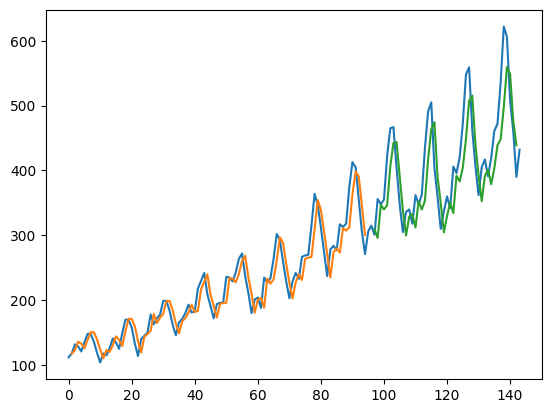

In [16]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()